# logistic regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/somaa/Downloads/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data exploration

In [6]:
left=df[df.left==1]
left.shape

(3571, 10)

In [7]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [9]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


through this data we can infer that
1. satisfaction level for thos who left (0.44) was lower than those who were retained (0.66)
2. average monthly hours for those who left (207) was higher than those who were retained (199)
3. promtion was lower for those who left (0.005) than those who were retained (0.02)

Text(0.5, 1.0, 'effect of salary on employee retention')

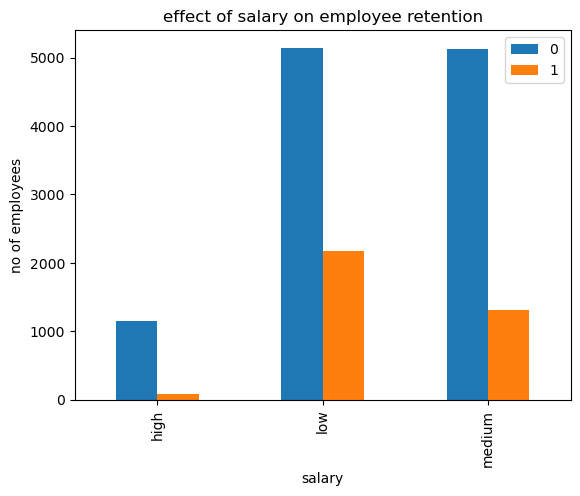

In [15]:
pd.crosstab(df.salary,df.left).plot(kind="bar")
plt.xlabel("salary")
plt.ylabel("no of employees")
plt.legend()
plt.title("effect of salary on employee retention")

from this plot we can see that employees with high salary are less likely to leave the company

Text(0.5, 1.0, 'effect of department on employee retention')

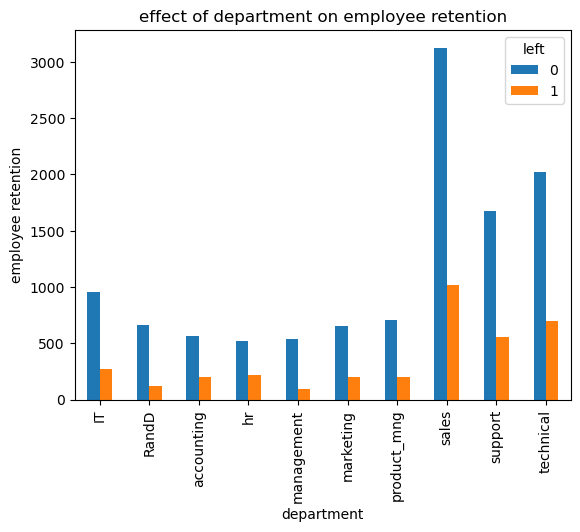

In [14]:
pd.crosstab(df.Department,df.left).plot(kind="bar")
plt.xlabel("department")
plt.ylabel("employee retention")
plt.title("effect of department on employee retention")

with this plot we cannot see much dependence of employee retention on department

We will use the following parameters for our model
1. satisfaction_level
2. average_montly_hours	
3. promotion_last_5years
4. salary

In [25]:
d=df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary","left"]]
d.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,1,1
1,0.80,262,0,2,1
2,0.11,272,0,2,1
3,0.72,223,0,1,1
4,0.37,159,0,1,1


In [26]:
# one hot encoding for salary column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [27]:
df1=d
df1.salary=le.fit_transform(df1.salary)
df1

C:\Users\somaa\AppData\Local\Temp\ipykernel_16484\4079100362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.salary=le.fit_transform(df1.salary)


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,1,1
1,0.80,262,0,2,1
2,0.11,272,0,2,1
3,0.72,223,0,1,1
4,0.37,159,0,1,1
...,...,...,...,...,...
14994,0.40,151,0,1,1
14995,0.37,160,0,1,1
14996,0.37,143,0,1,1
14997,0.11,280,0,1,1


In [ ]:
#low=1, medium=2, high=0

In [31]:
from sklearn.model_selection import train_test_split
X=df1[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]
y=df1["left"]

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8)

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
model.score(X_test,y_test)

0.7797037037037037